# Source Code Tugas Besar
# II2111 - Probabilitas dan Statistik
# Nama  : Afif Fahreza
# NIM   : 18219058

# === TAHAP PERSIAPAN AWAL === #

In [1]:
# import library-library penting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# membaca data dari excel
data = pd.read_excel("Data.xlsx", header=[0,1])

In [3]:
# melihat data
data

Nama Surveyor (Mahasiswa ) NIM Surveyor (Mahasiswa)  \
            Open-Ended Response      Open-Ended Response   
0             Vania Alya Qonita                 18219090   
1                     Abu Hanif                 13219053   
2             Nicholas Darmawan                 18219028   
3             Nicholas Darmawan                 18219028   
4                Gwyneth Winata                 10119075   
...                         ...                      ...   
2015           Sidartha Prastya                 13219033   
2016             Muhamad Taruna                 13219030   
2017                    cswadec                 19128312   
2018                       Jjjj                     2222   
2019                      Abbas                 25020002   

             Kelas Surveyor (Mahasiswa)                     Nama Responden  \
     STI (SIstem & Teknologi Informasi) Teknik Elektro Open-Ended Response   
0                                   1.0            NaN          indra bayu   
1                                   NaN            2.0     Mediana Safira    
2                                   1.0            NaN       Dewi Nathania   
3                                   1.0            NaN       Dewi Nathania   
4                                   1.0            NaN      Gwyneth Winata   
...                                 ...            ...                 ...   
2015                                NaN            2.0                   .   
2016                                NaN            2.0                 NaN   
2017                                1.0            NaN               jigur   
2018                                NaN            2.0                  Hh   
2019                                NaN            2.0               Abbas   

     Jenis kelamin ?               Usia :                          ...  \
       Laki â€“ laki Perempuan < 15 tahun 15-20 tahun 21-30 tahun  ...   
0                1.0       NaN        NaN         NaN         NaN  ...   
1                NaN       2.0        NaN         2.0         NaN  ...   
2                NaN       2.0        NaN         2.0         NaN  ...   
3                NaN       2.0        NaN         2.0         NaN  ...   
4                NaN       2.0        NaN         2.0         NaN  ...   
...              ...       ...        ...         ...         ...  ...   
2015             1.0       NaN        NaN         2.0         NaN  ...   
2016             NaN       NaN        NaN         NaN         NaN  ...   
2017             NaN       2.0        NaN         NaN         NaN  ...   
2018             1.0       NaN        NaN         2.0         NaN  ...   
2019             1.0       NaN        NaN         2.0         NaN  ...   

     Apakah Anda menggunakan fintech market provisioning berikut untuk membandingkan beberapa layanan?  \
                                                                                     lainnya, sebutkan   
0                                                   NaN                                                  
1                                                   NaN                                                  
2                                                   NaN                                                  
3                                                   NaN                                                  
4                                                   NaN                                                  
...                                                 ...                                                  
2015                                                NaN                                                  
2016                                                NaN                                                  
2017                                                NaN                                                  
2018                                                NaN                         

In [4]:
# melihat nama-nama kolom pada data
for col in data.columns:
    print(col)

('Nama Surveyor (Mahasiswa )', 'Open-Ended Response')
('NIM Surveyor (Mahasiswa)', 'Open-Ended Response')
('Kelas Surveyor (Mahasiswa)', 'STI (SIstem & Teknologi Informasi)')
('Kelas Surveyor (Mahasiswa)', 'Teknik Elektro')
('Nama Responden', 'Open-Ended Response')
('Jenis kelamin ?', 'Laki â€“ laki')
('Jenis kelamin ?', 'Perempuan')
('Usia :', '< 15 tahun')
('Usia :', '15-20 tahun')
('Usia :', '21-30 tahun')
('Usia :', '31-40 tahun')
('Usia :', '41-50 tahun')
('Usia :', '>50 tahun')
('Pendidikan Terakhir?', 'SD')
('Pendidikan Terakhir?', 'SMP')
('Pendidikan Terakhir?', 'SMA')
('Pendidikan Terakhir?', 'S1')
('Pendidikan Terakhir?', 'S2')
('Pendidikan Terakhir?', 'S3')
('Pekerjaan?', 'Pelajar / Mahasiswa')
('Pekerjaan?', 'Karyawan Swasta')
('Pekerjaan?', 'Ibu Rumah Tangga')
('Pekerjaan?', 'Pegawai Negeri')
('Pekerjaan?', 'Profesi ( Dokter, Dosen, Pengacara, dll)')
('Pekerjaan?', 'Pengusaha')
('Pekerjaan?', 'Lainnya, sebutkan')
('Penghasilan per bulan?', '< Rp 2 juta')
('Penghasilan per 

# === TAHAP DATA CLEANING DAN DATA SCREENING === #

In [5]:
# menghilangkan data-data invalid dimana NIM surveyor tidak diawali dengan '182' dan '132' atau tidak berdigit 8
for index, row in data.iterrows():
    nim = str(row[('NIM Surveyor (Mahasiswa)', 'Open-Ended Response')])
    if ((nim[0:3] != '182') & (nim[0:3] != '132')) | (len(nim)!=8) :
        data.drop(index, inplace=True)

In [6]:
# pengecekan banyak baris yang terhapus
# setelah menghapus data yang tidak memiliki nim surveyor valid, banyak data berubah dari 2020 baris menjadi 1904 baris
len(data)

1904

In [7]:
# menghilangkan data-data yang tidak mempunyai nama responden dan duplikat berdasarkan nim surveyor + nama responden
data = data[data[('Nama Responden', 'Open-Ended Response')].notna()]
data = data.drop_duplicates(subset=[('NIM Surveyor (Mahasiswa)', 'Open-Ended Response'), ('Nama Responden', 'Open-Ended Response')], keep='first')

In [8]:
# pengecekan banyak baris yang terhapus
# setelah menghapus data NA dan duplikat, banyak data berubah dari 1904 baris menjadi 1737 baris
len(data)

1737

In [9]:
# menggabung dua row header menjadi satu row
data.columns = [f'{i}{j}' for i, j in data.columns]

In [10]:
# mengecek header yang telah digabung
for col in data.columns:
    print(col)

Nama Surveyor (Mahasiswa )Open-Ended Response
NIM Surveyor (Mahasiswa)Open-Ended Response
Kelas Surveyor (Mahasiswa)STI (SIstem & Teknologi Informasi)
Kelas Surveyor (Mahasiswa)Teknik Elektro
Nama RespondenOpen-Ended Response
Jenis kelamin ?Laki â€“ laki
Jenis kelamin ?Perempuan
Usia :< 15 tahun
Usia :15-20 tahun
Usia :21-30 tahun
Usia :31-40 tahun
Usia :41-50 tahun
Usia :>50 tahun
Pendidikan Terakhir?SD
Pendidikan Terakhir?SMP
Pendidikan Terakhir?SMA
Pendidikan Terakhir?S1
Pendidikan Terakhir?S2
Pendidikan Terakhir?S3
Pekerjaan?Pelajar / Mahasiswa
Pekerjaan?Karyawan Swasta
Pekerjaan?Ibu Rumah Tangga
Pekerjaan?Pegawai Negeri
Pekerjaan?Profesi ( Dokter, Dosen, Pengacara, dll)
Pekerjaan?Pengusaha
Pekerjaan?Lainnya, sebutkan
Penghasilan per bulan?< Rp 2 juta
Penghasilan per bulan?Rp 2 juta â€“ Rp 5 juta
Penghasilan per bulan?Rp 5 juta â€“ Rp 10 juta
Penghasilan per bulan?> Rp 10 juta
Domisili saat iniJakarta
Domisili saat iniBandung
Domisili saat iniYogyakarta
Domisili saat iniTangerang
D

In [11]:
# merubah nama header kolom dan menggabungkan kolom

data.rename(columns = {'Nama Surveyor (Mahasiswa )Open-Ended Response':'Nama Surveyor'}, inplace=True)

data.rename(columns = {'NIM Surveyor (Mahasiswa)Open-Ended Response':'NIM Surveyor'}, inplace=True)

data['Kelas Surveyor (Mahasiswa)STI (SIstem & Teknologi Informasi)'].fillna(data['Kelas Surveyor (Mahasiswa)Teknik Elektro'],inplace=True)
del data['Kelas Surveyor (Mahasiswa)Teknik Elektro']
data.rename(columns = {'Kelas Surveyor (Mahasiswa)STI (SIstem & Teknologi Informasi)':'Kelas Surveyor'}, inplace=True)
data['Kelas Surveyor'] = data['Kelas Surveyor'].astype(str)
data['Kelas Surveyor'].replace(['1.0','2.0'],['STI','EL'], inplace=True)

data.rename(columns = {'Nama RespondenOpen-Ended Response':'Nama Responden'}, inplace=True)

data['Jenis kelamin ?Laki â€“ laki'].fillna(data['Jenis kelamin ?Perempuan'],inplace=True)
del data['Jenis kelamin ?Perempuan']
data.rename(columns = {'Jenis kelamin ?Laki â€“ laki':'Jenis Kelamin'}, inplace=True)
data['Jenis Kelamin'] = data['Jenis Kelamin'].astype(str)
data['Jenis Kelamin'].replace(['1.0','2.0'],['Laki-laki','Perempuan'], inplace=True)

In [12]:
# menggabung kolom usia
data.rename(columns = {'Usia :< 15 tahun':'Usia'}, inplace=True)
for i in data.iloc[:,6:11]:
    data['Usia'].fillna(data[i],inplace=True)
    del data[i]
data['Usia'] = data['Usia'].astype(str)
data['Usia'].replace(['1.0','2.0','3.0','4.0','5.0','6.0'],['<15 tahun','15-20 tahun','21-30 tahun','31-40 tahun','41-50 tahun','>50 tahun'], inplace=True)

In [13]:
# menggabung kolom pendidikan terakhir
data.rename(columns = {'Pendidikan Terakhir?SD':'Pendidikan Terakhir'}, inplace=True)
for i in data.iloc[:,7:12]:
    data['Pendidikan Terakhir'].fillna(data[i],inplace=True)
    del data[i]
data['Pendidikan Terakhir'] = data['Pendidikan Terakhir'].astype(str)
data['Pendidikan Terakhir'].replace(['1.0','2.0','3.0','4.0','5.0','6.0'],['SD','SMP','SMA','S1','S2','S3'], inplace=True)

In [14]:
# menggabung kolom pekerjaan
data.rename(columns = {'Pekerjaan?Pelajar / Mahasiswa':'Pekerjaan'}, inplace=True)
for i in data.iloc[:,8:14]:
    data['Pekerjaan'].fillna(data[i],inplace=True)
    del data[i]
data['Pekerjaan'] = data['Pekerjaan'].astype(str)
data['Pekerjaan'].replace(['1.0','2.0','3.0','4.0','5.0','6.0'],['Pelajar / Mahasiswa','Karyawan Swasta','Ibu Rumah Tangga','Pegawai Negri','Profesi','Pengusaha'], inplace=True)

In [15]:
# menggabung kolom penghasilan
data.rename(columns = {'Penghasilan per bulan?< Rp 2 juta':'Penghasilan Bulanan'}, inplace=True)
for i in data.iloc[:,9:12]:
    data['Penghasilan Bulanan'].fillna(data[i],inplace=True)
    del data[i]
data['Penghasilan Bulanan'] = data['Penghasilan Bulanan'].astype(str)
data['Penghasilan Bulanan'].replace(['1.0','2.0','3.0','4.0'],['< Rp 2 juta','Rp 2 juta - Rp 5 juta','Rp 5 juta - Rp 10 juta','> Rp 10 juta'], inplace=True)

In [16]:
# menggabung kolom domisili
data.rename(columns = {'Domisili saat iniJakarta':'Domisili'}, inplace=True)
for i in data.iloc[:,10:16]:
    data['Domisili'].fillna(data[i],inplace=True)
    del data[i]
data['Domisili'] = data['Domisili'].astype(str)
data['Domisili'].replace(['1.0','2.0','3.0','4.0','5.0','6.0'],['Jakarta','Bandung','Yogyakarta','Tangerang','Surabaya','Bali'], inplace=True)

In [17]:
# menggabung kolom peningkatan aktivitas online
data.rename(columns = {'Apakah aktivitas online anda meningkat dalam 3 bulan terakhir?Ya':'Peningkatan Aktivitas Online'}, inplace=True)
for i in data.iloc[:,11:13]:
    data['Peningkatan Aktivitas Online'].fillna(data[i],inplace=True)
    del data[i]
data['Peningkatan Aktivitas Online'] = data['Peningkatan Aktivitas Online'].astype(str)
data['Peningkatan Aktivitas Online'].replace(['1.0','2.0','3.0'],['Ya','Tidak','Sama saja'], inplace=True)

In [18]:
# menggabung kolom durasi penggunaan internet
data.rename(columns = {'Rata-rata durasi menggunakan internet Aktif tiap hari ?1 jam':'Durasi Penggunaan Internet'}, inplace=True)
for i in data.iloc[:,12:20]:
    data['Durasi Penggunaan Internet'].fillna(data[i],inplace=True)
    del data[i]
data['Durasi Penggunaan Internet'] = data['Durasi Penggunaan Internet'].astype(str)
data['Durasi Penggunaan Internet'].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0'],['1 jam','2 jam','3 jam','4 jam','5 jam','6 jam','7 jam','8 jam','> 8 jam'], inplace=True)

In [19]:
# menggabung kolom akses provider internet
data.rename(columns = {'Akses atau provider internet yang digunakan selama ini?Menggunakan Mobile Data':'Cara Akses Provider Internet'}, inplace=True)
for i in data.iloc[:,13:15]:
    data['Cara Akses Provider Internet'].fillna(data[i],inplace=True)
    del data[i]
data['Cara Akses Provider Internet'] = data['Cara Akses Provider Internet'].astype(str)
data['Cara Akses Provider Internet'].replace(['1.0','2.0','3.0'],['Mobile data','Broadband','Mobile data dan broadband'], inplace=True)
data.rename(columns = {'Akses atau provider internet yang digunakan selama ini?Mohon sebutkan nama provider yang digunakan (misalnya Telkomsel, Indosat, Telkom Indihome, First Media, dll)':'Provider Internet'}, inplace=True)

In [20]:
# menggabung kolom pengeluaran mobile data
data.rename(columns = {data.columns[14]:'Pengeluaran Mobile Data'}, inplace=True)
for i in data.iloc[:,15:20]:
    data['Pengeluaran Mobile Data'].fillna(data[i],inplace=True)
    del data[i]
data['Pengeluaran Mobile Data'] = data['Pengeluaran Mobile Data'].astype(str)
data['Pengeluaran Mobile Data'].replace(['1.0','2.0','3.0','4.0','5.0','6.0'],['< Rp 100 ribu','Rp 100 ribu - Rp 200 ribu','Rp 201 ribu - Rp 300 ribu','Rp 301 ribu - Rp 400 ribu','Rp 401 ribu - Rp 500 ribu','> Rp 500 ribu'], inplace=True)

In [21]:
# menggabung kolom pengeluaran broadband
data.rename(columns = {data.columns[15]:'Pengeluaran Broadband'}, inplace=True)
for i in data.iloc[:,16:21]:
    data['Pengeluaran Broadband'].fillna(data[i],inplace=True)
    del data[i]
data['Pengeluaran Broadband'] = data['Pengeluaran Broadband'].astype(str)
data['Pengeluaran Broadband'].replace(['1.0','2.0','3.0','4.0','5.0','6.0'],['< Rp 100 ribu','Rp 100 ribu - Rp 200 ribu','Rp 201 ribu - Rp 300 ribu','Rp 301 ribu - Rp 400 ribu','Rp 401 ribu - Rp 500 ribu','> Rp 500 ribu'], inplace=True)

In [22]:
# Fungsi concat untuk multivalued cell
def concat(*args):
    strs = [str(arg) for arg in args if arg!='nan']
    return ','.join(strs) if strs else 'nan'
np_concat = np.vectorize(concat)

In [23]:
# menggabung kolom aktivitas online

for i in data.iloc[:,16:28]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0','11.0'],['Berbelanja online','Streaming video/ film','Melakukan video conference','Delivery Makanan','Mengikuti kelas olahraga secara online','Mengikuti kelas online','Akses media sosial','Game online','Menonton e-sport','Membeli obat-obatan secara online','Melakukan konsultasi kesehatan secara online'], inplace=True)

data.rename(columns = {data.columns[16]:'Aktivitas Online Meningkat'}, inplace=True)

for i in data.iloc[:,17:28]:
    data['Aktivitas Online Meningkat'] = np_concat(data['Aktivitas Online Meningkat'],data[i])
    del data[i]

In [24]:
# menggabung kolom Frekuensi Belanja Online
data.rename(columns = {data.columns[17]:'Frekuensi Belanja Online'}, inplace=True)
for i in data.iloc[:,18:25]:
    data['Frekuensi Belanja Online'].fillna(data[i],inplace=True)
    del data[i]
data['Frekuensi Belanja Online'] = data['Frekuensi Belanja Online'].astype(str)
data['Frekuensi Belanja Online'].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0'],['Beberapa kali dalam sehari / setiap hari','2-3 kali seminggu','4-6 kali seminggu','sekali seminggu','Beberapa kali dalam sebulan','setiap bulan','Beberapa bulan sekali','Tidak pernah'], inplace=True)

In [25]:
# menggabung kolom Frekuensi Streaming Video
data.rename(columns = {data.columns[18]:'Frekuensi Streaming Video'}, inplace=True)
for i in data.iloc[:,19:26]:
    data['Frekuensi Streaming Video'].fillna(data[i],inplace=True)
    del data[i]
data['Frekuensi Streaming Video'] = data['Frekuensi Streaming Video'].astype(str)
data['Frekuensi Streaming Video'].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0'],['Beberapa kali dalam sehari / setiap hari','2-3 kali seminggu','4-6 kali seminggu','sekali seminggu','Beberapa kali dalam sebulan','setiap bulan','Beberapa bulan sekali','Tidak pernah'], inplace=True)

In [26]:
# menggabung kolom Frekuensi Video Conference
data.rename(columns = {data.columns[19]:'Frekuensi Video Conference'}, inplace=True)
for i in data.iloc[:,20:27]:
    data['Frekuensi Video Conference'].fillna(data[i],inplace=True)
    del data[i]
data['Frekuensi Video Conference'] = data['Frekuensi Video Conference'].astype(str)
data['Frekuensi Video Conference'].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0'],['Beberapa kali dalam sehari / setiap hari','2-3 kali seminggu','4-6 kali seminggu','sekali seminggu','Beberapa kali dalam sebulan','setiap bulan','Beberapa bulan sekali','Tidak pernah'], inplace=True)

In [27]:
# menggabung kolom Frekuensi Delivery Makanan
data.rename(columns = {data.columns[20]:'Frekuensi Delivery Makanan'}, inplace=True)
for i in data.iloc[:,21:28]:
    data['Frekuensi Delivery Makanan'].fillna(data[i],inplace=True)
    del data[i]
data['Frekuensi Delivery Makanan'] = data['Frekuensi Delivery Makanan'].astype(str)
data['Frekuensi Delivery Makanan'].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0'],['Beberapa kali dalam sehari / setiap hari','2-3 kali seminggu','4-6 kali seminggu','sekali seminggu','Beberapa kali dalam sebulan','setiap bulan','Beberapa bulan sekali','Tidak pernah'], inplace=True)

In [28]:
# menggabung kolom Frekuensi Kelas Olahraga Online
data.rename(columns = {data.columns[21]:'Frekuensi Kelas Olahraga Online'}, inplace=True)
for i in data.iloc[:,22:29]:
    data['Frekuensi Kelas Olahraga Online'].fillna(data[i],inplace=True)
    del data[i]
data['Frekuensi Kelas Olahraga Online'] = data['Frekuensi Kelas Olahraga Online'].astype(str)
data['Frekuensi Kelas Olahraga Online'].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0'],['Beberapa kali dalam sehari / setiap hari','2-3 kali seminggu','4-6 kali seminggu','sekali seminggu','Beberapa kali dalam sebulan','setiap bulan','Beberapa bulan sekali','Tidak pernah'], inplace=True)

In [29]:
# menggabung kolom Frekuensi Kelas Online
data.rename(columns = {data.columns[22]:'Frekuensi Kelas Online'}, inplace=True)
for i in data.iloc[:,23:30]:
    data['Frekuensi Kelas Online'].fillna(data[i],inplace=True)
    del data[i]
data['Frekuensi Kelas Online'] = data['Frekuensi Kelas Online'].astype(str)
data['Frekuensi Kelas Online'].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0'],['Beberapa kali dalam sehari / setiap hari','2-3 kali seminggu','4-6 kali seminggu','sekali seminggu','Beberapa kali dalam sebulan','setiap bulan','Beberapa bulan sekali','Tidak pernah'], inplace=True)

In [30]:
# menggabung kolom Frekuensi Akses Medsos
data.rename(columns = {data.columns[23]:'Frekuensi Akses Medsos'}, inplace=True)
for i in data.iloc[:,24:31]:
    data['Frekuensi Akses Medsos'].fillna(data[i],inplace=True)
    del data[i]
data['Frekuensi Akses Medsos'] = data['Frekuensi Akses Medsos'].astype(str)
data['Frekuensi Akses Medsos'].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0'],['Beberapa kali dalam sehari / setiap hari','2-3 kali seminggu','4-6 kali seminggu','sekali seminggu','Beberapa kali dalam sebulan','setiap bulan','Beberapa bulan sekali','Tidak pernah'], inplace=True)

In [31]:
# menggabung kolom Frekuensi Game Online
data.rename(columns = {data.columns[24]:'Frekuensi Game Online'}, inplace=True)
for i in data.iloc[:,25:32]:
    data['Frekuensi Game Online'].fillna(data[i],inplace=True)
    del data[i]
data['Frekuensi Game Online'] = data['Frekuensi Game Online'].astype(str)
data['Frekuensi Game Online'].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0'],['Beberapa kali dalam sehari / setiap hari','2-3 kali seminggu','4-6 kali seminggu','sekali seminggu','Beberapa kali dalam sebulan','setiap bulan','Beberapa bulan sekali','Tidak pernah'], inplace=True)

In [32]:
# menggabung kolom Frekuensi Menonton Esports
data.rename(columns = {data.columns[25]:'Frekuensi Menonton Esports'}, inplace=True)
for i in data.iloc[:,26:33]:
    data['Frekuensi Menonton Esports'].fillna(data[i],inplace=True)
    del data[i]
data['Frekuensi Menonton Esports'] = data['Frekuensi Menonton Esports'].astype(str)
data['Frekuensi Menonton Esports'].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0'],['Beberapa kali dalam sehari / setiap hari','2-3 kali seminggu','4-6 kali seminggu','sekali seminggu','Beberapa kali dalam sebulan','setiap bulan','Beberapa bulan sekali','Tidak pernah'], inplace=True)

In [33]:
# menggabung kolom Frekuensi Membeli Obat Online
data.rename(columns = {data.columns[26]:'Frekuensi Membeli Obat Online'}, inplace=True)
for i in data.iloc[:,27:34]:
    data['Frekuensi Membeli Obat Online'].fillna(data[i],inplace=True)
    del data[i]
data['Frekuensi Membeli Obat Online'] = data['Frekuensi Membeli Obat Online'].astype(str)
data['Frekuensi Membeli Obat Online'].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0'],['Beberapa kali dalam sehari / setiap hari','2-3 kali seminggu','4-6 kali seminggu','sekali seminggu','Beberapa kali dalam sebulan','setiap bulan','Beberapa bulan sekali','Tidak pernah'], inplace=True)

In [34]:
# menggabung kolom Frekuensi Konsultasi Kesehatan Online
data.rename(columns = {data.columns[27]:'Frekuensi Konsultasi Kesehatan Online'}, inplace=True)
for i in data.iloc[:,28:35]:
    data['Frekuensi Konsultasi Kesehatan Online'].fillna(data[i],inplace=True)
    del data[i]
data['Frekuensi Konsultasi Kesehatan Online'] = data['Frekuensi Konsultasi Kesehatan Online'].astype(str)
data['Frekuensi Konsultasi Kesehatan Online'].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0'],['Beberapa kali dalam sehari / setiap hari','2-3 kali seminggu','4-6 kali seminggu','sekali seminggu','Beberapa kali dalam sebulan','setiap bulan','Beberapa bulan sekali','Tidak pernah'], inplace=True)

In [35]:
# menggabungkan kolom-kolom kecenderungan

data.rename(columns = {data.columns[28]:'Kecenderungan Bekerja/Belajar'}, inplace=True)
data['Kecenderungan Bekerja/Belajar'].fillna(data['Dalam 3 bulan terakhir (terkait pandemic), bagaimana kecenderungan Anda dalam melakukan kegiatan berikut?Bekerja / belajar - Online/ Virtual'],inplace=True)
del data['Dalam 3 bulan terakhir (terkait pandemic), bagaimana kecenderungan Anda dalam melakukan kegiatan berikut?Bekerja / belajar - Online/ Virtual']

data.rename(columns = {data.columns[29]:'Kecenderungan Meeting'}, inplace=True)
data['Kecenderungan Meeting'].fillna(data['Dalam 3 bulan terakhir (terkait pandemic), bagaimana kecenderungan Anda dalam melakukan kegiatan berikut?Meeting - Online/ Virtual'],inplace=True)
del data['Dalam 3 bulan terakhir (terkait pandemic), bagaimana kecenderungan Anda dalam melakukan kegiatan berikut?Meeting - Online/ Virtual']

data.rename(columns = {data.columns[30]:'Kecenderungan Mengikuti Workshop/Seminar'}, inplace=True)
data['Kecenderungan Mengikuti Workshop/Seminar'].fillna(data['Dalam 3 bulan terakhir (terkait pandemic), bagaimana kecenderungan Anda dalam melakukan kegiatan berikut?Mengikuti workshop/ seminar - Online/ Virtual'],inplace=True)
del data['Dalam 3 bulan terakhir (terkait pandemic), bagaimana kecenderungan Anda dalam melakukan kegiatan berikut?Mengikuti workshop/ seminar - Online/ Virtual']

data.rename(columns = {data.columns[31]:'Kecenderungan Menonton Film'}, inplace=True)
data['Kecenderungan Menonton Film'].fillna(data['Dalam 3 bulan terakhir (terkait pandemic), bagaimana kecenderungan Anda dalam melakukan kegiatan berikut?Menonton film - Online/ Virtual'],inplace=True)
del data['Dalam 3 bulan terakhir (terkait pandemic), bagaimana kecenderungan Anda dalam melakukan kegiatan berikut?Menonton film - Online/ Virtual']

data.rename(columns = {data.columns[32]:'Kecenderungan Menonton Konser'}, inplace=True)
data['Kecenderungan Menonton Konser'].fillna(data['Dalam 3 bulan terakhir (terkait pandemic), bagaimana kecenderungan Anda dalam melakukan kegiatan berikut?Menonton konser - Online/ Virtual'],inplace=True)
del data['Dalam 3 bulan terakhir (terkait pandemic), bagaimana kecenderungan Anda dalam melakukan kegiatan berikut?Menonton konser - Online/ Virtual']

data.rename(columns = {data.columns[33]:'Kecenderungan Family / Social gathering'}, inplace=True)
data['Kecenderungan Family / Social gathering'].fillna(data['Dalam 3 bulan terakhir (terkait pandemic), bagaimana kecenderungan Anda dalam melakukan kegiatan berikut?Family/ social gathering - Online/ Virtual'],inplace=True)
del data['Dalam 3 bulan terakhir (terkait pandemic), bagaimana kecenderungan Anda dalam melakukan kegiatan berikut?Family/ social gathering - Online/ Virtual']

data.rename(columns = {data.columns[34]:'Kecenderungan Konsultasi Kesehatan'}, inplace=True)
data['Kecenderungan Konsultasi Kesehatan'].fillna(data['Dalam 3 bulan terakhir (terkait pandemic), bagaimana kecenderungan Anda dalam melakukan kegiatan berikut?Konsultasi masalah kesehatan - Online/ Virtual'],inplace=True)
del data['Dalam 3 bulan terakhir (terkait pandemic), bagaimana kecenderungan Anda dalam melakukan kegiatan berikut?Konsultasi masalah kesehatan - Online/ Virtual']

for i in data.iloc[:,28:35]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0'],['Offline','Online'], inplace=True)

In [36]:
# menggabung kolom media komunikasi online

for i in data.iloc[:,35:41]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0'],['Email','Chatting','Conference Call','Video Streaming','Web Download'], inplace=True)

data.rename(columns = {data.columns[35]:'Media Komunikasi WFH / Online Class'}, inplace=True)

for i in data.iloc[:,36:41]:
    data['Media Komunikasi WFH / Online Class'] = np_concat(data['Media Komunikasi WFH / Online Class'],data[i])
    del data[i]

In [37]:
# menggabung kolom aplikasi wfh / online class

for i in data.iloc[:,36:44]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0'],['Whatsapp','Zoom','Google Meet','Microsoft Teams','Cisco Webex','Skype for Business','GoToMeeting'], inplace=True)

data.rename(columns = {data.columns[36]:'Aplikasi WFH / Online Class'}, inplace=True)

for i in data.iloc[:,37:44]:
    data['Aplikasi WFH / Online Class'] = np_concat(data['Aplikasi WFH / Online Class'],data[i])
    del data[i]

In [38]:
# menggabung kolom alasan penggunaan aplikasi

for i in data.iloc[:,37:44]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0','6.0'],['Mudah digunakan','Digunakan banyak orang','Hemat kuota/ bandwidth','Lebih aman','Durasi panggilan tanpa batas','Telah ditentukan oleh perusahaan atau pihak yang lebih berwenang'], inplace=True)

data.rename(columns = {data.columns[37]:'Alasan Penggunaan Aplikasi'}, inplace=True)

for i in data.iloc[:,38:44]:
    data['Alasan Penggunaan Aplikasi'] = np_concat(data['Alasan Penggunaan Aplikasi'],data[i])
    del data[i]

In [39]:
# menggabung kolom penggunaan layanan bank

for i in data.iloc[:,38:44]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0','6.0'],['ATM','Internet Banking','Mobile Banking','SMS Banking','Kartu Kredit','Datang ke Kantor Cabang'], inplace=True)

data.rename(columns = {data.columns[38]:'Penggunaan Layanan Bank'}, inplace=True)

for i in data.iloc[:,39:44]:
    data['Penggunaan Layanan Bank'] = np_concat(data['Penggunaan Layanan Bank'],data[i])
    del data[i]

In [40]:
# menggabung kolom layanan bank atm

for i in data.iloc[:,39:46]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0'],['Bank BRI','Bank BNI','Bank Mandiri','Bank BCA','Bank CIMB Niaga','Bank BTN','Bank Permata'], inplace=True)

data.rename(columns = {data.columns[39]:'Layanan Bank ATM'}, inplace=True)

for i in data.iloc[:,40:46]:
    data['Layanan Bank ATM'] = np_concat(data['Layanan Bank ATM'],data[i])
    del data[i]

In [41]:
# menggabung kolom layanan bank internet banking

for i in data.iloc[:,40:47]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0'],['Bank BRI','Bank BNI','Bank Mandiri','Bank BCA','Bank CIMB Niaga','Bank BTN','Bank Permata'], inplace=True)

data.rename(columns = {data.columns[40]:'Layanan Bank Internet Banking'}, inplace=True)

for i in data.iloc[:,41:47]:
    data['Layanan Bank Internet Banking'] = np_concat(data['Layanan Bank Internet Banking'],data[i])
    del data[i]

In [42]:
# menggabung kolom layanan bank Mobile Banking

for i in data.iloc[:,41:48]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0'],['Bank BRI','Bank BNI','Bank Mandiri','Bank BCA','Bank CIMB Niaga','Bank BTN','Bank Permata'], inplace=True)

data.rename(columns = {data.columns[41]:'Layanan Bank Mobile Banking'}, inplace=True)

for i in data.iloc[:,42:48]:
    data['Layanan Bank Mobile Banking'] = np_concat(data['Layanan Bank Mobile Banking'],data[i])
    del data[i]

In [43]:
# menggabung kolom layanan bank SMS Banking

for i in data.iloc[:,42:49]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0'],['Bank BRI','Bank BNI','Bank Mandiri','Bank BCA','Bank CIMB Niaga','Bank BTN','Bank Permata'], inplace=True)

data.rename(columns = {data.columns[42]:'Layanan Bank SMS Banking'}, inplace=True)

for i in data.iloc[:,43:49]:
    data['Layanan Bank SMS Banking'] = np_concat(data['Layanan Bank SMS Banking'],data[i])
    del data[i]

In [44]:
# menggabung kolom layanan bank Kartu Kredit

for i in data.iloc[:,43:50]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0'],['Bank BRI','Bank BNI','Bank Mandiri','Bank BCA','Bank CIMB Niaga','Bank BTN','Bank Permata'], inplace=True)

data.rename(columns = {data.columns[43]:'Layanan Bank Kartu Kredit'}, inplace=True)

for i in data.iloc[:,44:50]:
    data['Layanan Bank Kartu Kredit'] = np_concat(data['Layanan Bank Kartu Kredit'],data[i])
    del data[i]

In [45]:
# menggabung kolom layanan bank Kantor Cabang

for i in data.iloc[:,44:51]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0'],['Bank BRI','Bank BNI','Bank Mandiri','Bank BCA','Bank CIMB Niaga','Bank BTN','Bank Permata'], inplace=True)

data.rename(columns = {data.columns[44]:'Layanan Bank Kantor Cabang'}, inplace=True)

for i in data.iloc[:,45:51]:
    data['Layanan Bank Kantor Cabang'] = np_concat(data['Layanan Bank Kantor Cabang'],data[i])
    del data[i]

In [46]:
# mengubah kolom layanan lainnya
data.rename(columns = {data.columns[45]:'Layanan Lainnya'}, inplace=True)

In [47]:
# menggabung kolom Frekuensi Penggunaan ATM
data.rename(columns = {data.columns[46]:'Frekuensi Penggunaan ATM'}, inplace=True)
for i in data.iloc[:,47:51]:
    data['Frekuensi Penggunaan ATM'].fillna(data[i],inplace=True)
    del data[i]
data['Frekuensi Penggunaan ATM'] = data['Frekuensi Penggunaan ATM'].astype(str)
data['Frekuensi Penggunaan ATM'].replace(['1.0','2.0','3.0','4.0','5.0'],['> 10 kali per bulan','6-9 kali per bulan','2-5 kali per bulan','kurang dari atau sekali per bulan','Tidak pernah'], inplace=True)

In [48]:
# menggabung kolom Frekuensi Penggunaan Internet Banking
data.rename(columns = {data.columns[47]:'Frekuensi Penggunaan Internet Banking'}, inplace=True)
for i in data.iloc[:,48:52]:
    data['Frekuensi Penggunaan Internet Banking'].fillna(data[i],inplace=True)
    del data[i]
data['Frekuensi Penggunaan Internet Banking'] = data['Frekuensi Penggunaan Internet Banking'].astype(str)
data['Frekuensi Penggunaan Internet Banking'].replace(['1.0','2.0','3.0','4.0','5.0'],['> 10 kali per bulan','6-9 kali per bulan','2-5 kali per bulan','kurang dari atau sekali per bulan','Tidak pernah'], inplace=True)

In [49]:
# menggabung kolom Frekuensi Penggunaan Mobile Banking
data.rename(columns = {data.columns[48]:'Frekuensi Penggunaan Mobile Banking'}, inplace=True)
for i in data.iloc[:,49:53]:
    data['Frekuensi Penggunaan Mobile Banking'].fillna(data[i],inplace=True)
    del data[i]
data['Frekuensi Penggunaan Mobile Banking'] = data['Frekuensi Penggunaan Mobile Banking'].astype(str)
data['Frekuensi Penggunaan Mobile Banking'].replace(['1.0','2.0','3.0','4.0','5.0'],['> 10 kali per bulan','6-9 kali per bulan','2-5 kali per bulan','kurang dari atau sekali per bulan','Tidak pernah'], inplace=True)

In [50]:
# menggabung kolom Frekuensi Penggunaan SMS Banking
data.rename(columns = {data.columns[49]:'Frekuensi Penggunaan SMS Banking'}, inplace=True)
for i in data.iloc[:,50:54]:
    data['Frekuensi Penggunaan SMS Banking'].fillna(data[i],inplace=True)
    del data[i]
data['Frekuensi Penggunaan SMS Banking'] = data['Frekuensi Penggunaan SMS Banking'].astype(str)
data['Frekuensi Penggunaan SMS Banking'].replace(['1.0','2.0','3.0','4.0','5.0'],['> 10 kali per bulan','6-9 kali per bulan','2-5 kali per bulan','kurang dari atau sekali per bulan','Tidak pernah'], inplace=True)

In [51]:
# menggabung kolom Frekuensi Datang ke Cabang
data.rename(columns = {data.columns[50]:'Frekuensi Datang ke Cabang'}, inplace=True)
for i in data.iloc[:,51:55]:
    data['Frekuensi Datang ke Cabang'].fillna(data[i],inplace=True)
    del data[i]
data['Frekuensi Datang ke Cabang'] = data['Frekuensi Datang ke Cabang'].astype(str)
data['Frekuensi Datang ke Cabang'].replace(['1.0','2.0','3.0','4.0','5.0'],['> 10 kali per bulan','6-9 kali per bulan','2-5 kali per bulan','kurang dari atau sekali per bulan','Tidak pernah'], inplace=True)

In [52]:
# menggabung kolom Pilihan Layanan

data.rename(columns = {data.columns[51]:'Pilihan Layanan Cek Saldo'}, inplace=True)
for i in data.iloc[:,52:56]:
    data['Pilihan Layanan Cek Saldo'].fillna(data[i],inplace=True)
    del data[i]
data['Pilihan Layanan Cek Saldo'] = data['Pilihan Layanan Cek Saldo'].astype(str)
data['Pilihan Layanan Cek Saldo'].replace(['1.0','2.0','3.0','4.0','5.0'],['ATM','Internet Banking','Mobile Banking','SMS Banking','Datang ke cabang'], inplace=True)

data.rename(columns = {data.columns[52]:'Pilihan Layanan Mutasi Rekening'}, inplace=True)
for i in data.iloc[:,53:57]:
    data['Pilihan Layanan Mutasi Rekening'].fillna(data[i],inplace=True)
    del data[i]
data['Pilihan Layanan Mutasi Rekening'] = data['Pilihan Layanan Mutasi Rekening'].astype(str)
data['Pilihan Layanan Mutasi Rekening'].replace(['1.0','2.0','3.0','4.0','5.0'],['ATM','Internet Banking','Mobile Banking','SMS Banking','Datang ke cabang'], inplace=True)

data.rename(columns = {data.columns[53]:'Pilihan Layanan Transfer Sesama Bank'}, inplace=True)
for i in data.iloc[:,54:58]:
    data['Pilihan Layanan Transfer Sesama Bank'].fillna(data[i],inplace=True)
    del data[i]
data['Pilihan Layanan Transfer Sesama Bank'] = data['Pilihan Layanan Transfer Sesama Bank'].astype(str)
data['Pilihan Layanan Transfer Sesama Bank'].replace(['1.0','2.0','3.0','4.0','5.0'],['ATM','Internet Banking','Mobile Banking','SMS Banking','Datang ke cabang'], inplace=True)

data.rename(columns = {data.columns[54]:'Pilihan Layanan Transfer Antar Bank'}, inplace=True)
for i in data.iloc[:,55:59]:
    data['Pilihan Layanan Transfer Antar Bank'].fillna(data[i],inplace=True)
    del data[i]
data['Pilihan Layanan Transfer Antar Bank'] = data['Pilihan Layanan Transfer Antar Bank'].astype(str)
data['Pilihan Layanan Transfer Antar Bank'].replace(['1.0','2.0','3.0','4.0','5.0'],['ATM','Internet Banking','Mobile Banking','SMS Banking','Datang ke cabang'], inplace=True)

data.rename(columns = {data.columns[55]:'Pilihan Layanan Pembelian Pulsa/Voucher'}, inplace=True)
for i in data.iloc[:,56:60]:
    data['Pilihan Layanan Pembelian Pulsa/Voucher'].fillna(data[i],inplace=True)
    del data[i]
data['Pilihan Layanan Pembelian Pulsa/Voucher'] = data['Pilihan Layanan Pembelian Pulsa/Voucher'].astype(str)
data['Pilihan Layanan Pembelian Pulsa/Voucher'].replace(['1.0','2.0','3.0','4.0','5.0'],['ATM','Internet Banking','Mobile Banking','SMS Banking','Datang ke cabang'], inplace=True)

data.rename(columns = {data.columns[56]:'Pilihan Layanan Pembayaran Tagihan'}, inplace=True)
for i in data.iloc[:,57:61]:
    data['Pilihan Layanan Pembayaran Tagihan'].fillna(data[i],inplace=True)
    del data[i]
data['Pilihan Layanan Pembayaran Tagihan'] = data['Pilihan Layanan Pembayaran Tagihan'].astype(str)
data['Pilihan Layanan Pembayaran Tagihan'].replace(['1.0','2.0','3.0','4.0','5.0'],['ATM','Internet Banking','Mobile Banking','SMS Banking','Datang ke cabang'], inplace=True)

In [53]:
# menggabung kolom keluhan layanan bank

for i in data.iloc[:,57:62]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0'],['Layanan/ Sistem down','Proses tidak berhasil namun saldo terpotong','Tidak melakukan transaksi tapi saldo terpotong','Transaksi / pembayaran yang sama terjadi dua kali'], inplace=True)

data.rename(columns = {data.columns[57]:'Keluhan Layanan Bank'}, inplace=True)

for i in data.iloc[:,58:62]:
    data['Keluhan Layanan Bank'] = np_concat(data['Keluhan Layanan Bank'],data[i])
    del data[i]

In [54]:
# menggabung kolom Pendaftaran Rekening Full Online
data.rename(columns = {data.columns[58]:'Pendaftaran Rekening Full Online'}, inplace=True)
for i in data.iloc[:,59:60]:
    data['Pendaftaran Rekening Full Online'].fillna(data[i],inplace=True)
    del data[i]
data['Pendaftaran Rekening Full Online'] = data['Pendaftaran Rekening Full Online'].astype(str)
data['Pendaftaran Rekening Full Online'].replace(['1.0','2.0'],['Pernah','Tidak Pernah'], inplace=True)

In [55]:
# menggabung kolom rekening bank online

for i in data.iloc[:,59:67]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0'],['Tidak pernah','Jenius by Bank BTPN','Digibank by Bank DBS','Permata Mobile X by Bank Permata','D-Bank by Bank Danamon','BRImo by BRI','BCA'], inplace=True)

data.rename(columns = {data.columns[59]:'Rekening Bank Full Online'}, inplace=True)

for i in data.iloc[:,60:67]:
    data['Rekening Bank Full Online'] = np_concat(data['Rekening Bank Full Online'],data[i])
    del data[i]

In [56]:
# menggabung kolom Alasan Pendaftaran Rekening Online

for i in data.iloc[:,60:66]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0'],['Tidak memiliki rekening di bank online','kemudahan transaksi','kemudahan pembukaan rekening','promo','sedang tren'], inplace=True)

data.rename(columns = {data.columns[60]:'Alasan Pendaftaran Rekening Online'}, inplace=True)

for i in data.iloc[:,61:66]:
    data['Alasan Pendaftaran Rekening Online'] = np_concat(data['Alasan Pendaftaran Rekening Online'],data[i])
    del data[i]

In [57]:
# menggabung kolom Fitur Rekening Online

for i in data.iloc[:,61:69]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0'],['Tidak memiliki rekening di bank online','Cek Saldo','Transfer','Pembelian Pulsa, eMoney, & voucher-voucher lainnya','Pembayaran Tagihan','Mutasi rekening/ History Transaksi/ Spending Tracker','Deposito'], inplace=True)

data.rename(columns = {data.columns[61]:'Fitur Rekening Online'}, inplace=True)

for i in data.iloc[:,62:69]:
    data['Fitur Rekening Online'] = np_concat(data['Fitur Rekening Online'],data[i])
    del data[i]

In [58]:
# menggabung kolom Keluhan Rekening Online

for i in data.iloc[:,62:69]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0','6.0'],['Tidak pernah mengalami keluhan','Sistem Error/ tidak dapat diakses','Transaksi tidak berhasil namun saldo berkurang','Tidak melakukan transaksi tapi saldo berkurang/ ada transaksi','Kesulitan menghubungi customer service','Rekening dihack'], inplace=True)

data.rename(columns = {data.columns[62]:'Keluhan Rekening Online'}, inplace=True)

for i in data.iloc[:,63:69]:
    data['Keluhan Rekening Online'] = np_concat(data['Keluhan Rekening Online'],data[i])
    del data[i]

In [59]:
# menggabung kolom Alasan Tidak Pernah Rekening Online

for i in data.iloc[:,63:68]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0'],['Tidak tahu ada Bank yang menyelenggarakan pembukaan rekening secara online','Tidak tertarik untuk membuka rekening secara online','Rekening Bank milik saya sudah cukup, tidak perlu membuka rekening baru','Tidak merasa aman memiliki bank hanya dengan mendaftar secara online'], inplace=True)

data.rename(columns = {data.columns[63]:'Alasan Tidak Pernah Rekening Online'}, inplace=True)

for i in data.iloc[:,64:68]:
    data['Alasan Tidak Pernah Rekening Online'] = np_concat(data['Alasan Tidak Pernah Rekening Online'],data[i])
    del data[i]

In [60]:
# menggabung kolom Pendaftaran Kartu Kredit Online
data.rename(columns = {data.columns[64]:'Pendaftaran Kartu Kredit Online'}, inplace=True)
for i in data.iloc[:,65:66]:
    data['Pendaftaran Kartu Kredit Online'].fillna(data[i],inplace=True)
    del data[i]
data['Pendaftaran Kartu Kredit Online'] = data['Pendaftaran Kartu Kredit Online'].astype(str)
data['Pendaftaran Kartu Kredit Online'].replace(['1.0','2.0'],['Pernah','Tidak Pernah'], inplace=True)
data.rename(columns = {data.columns[65]:'Penyelenggara Kartu Kredit Online'}, inplace=True)

In [61]:
# menggabung kolom Penggunaan EMoney

for i in data.iloc[:,66:79]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0','11.0','12.0'],['Tidak Menggunakan eMoney','GoPay','OVO','LinkAja','Dana','Paytren','ShopeePay','Flazz BCA','Brizzi','eMoney Mandiri','JakCard','iSaku'], inplace=True)

data.rename(columns = {data.columns[66]:'Penggunaan EMoney'}, inplace=True)

for i in data.iloc[:,67:79]:
    data['Penggunaan EMoney'] = np_concat(data['Penggunaan EMoney'],data[i])
    del data[i]

In [62]:
# menggabung kolom Alasan Penggunaan EMoney

for i in data.iloc[:,67:74]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0','6.0'],['Tidak Menggunakan eMoney','Simple','Efisien secara waktu','Tidak perlu datang ke bank','Promo','Aman'], inplace=True)

data.rename(columns = {data.columns[67]:'Alasan Penggunaan EMoney'}, inplace=True)

for i in data.iloc[:,68:74]:
    data['Alasan Penggunaan EMoney'] = np_concat(data['Alasan Penggunaan EMoney'],data[i])
    del data[i]

In [63]:
# menggabung kolom Keperluan Penggunaan EMoney

for i in data.iloc[:,68:80]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0','11.0'],['Tidak Menggunakan eMoney','Pembayaran transportasi online','Pembayaran tol','Pembayaran transportasi umum','Pembayaran tiket parkir','Pembelian delivery makanan','Pembayaran di restauran/ cafe','Pembayaran di minimarket','Pembayaran e-commerce','Pembelian pulsa','Pembayaran utilitas'], inplace=True)

data.rename(columns = {data.columns[68]:'Keperluan Penggunaan EMoney'}, inplace=True)

for i in data.iloc[:,69:80]:
    data['Keperluan Penggunaan EMoney'] = np_concat(data['Keperluan Penggunaan EMoney'],data[i])
    del data[i]

In [64]:
# menggabung kolom Cara Top Up EMoney

for i in data.iloc[:,69:78]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0'],['Tidak menggunakan eMoney','ATM','Mobile Banking','Internet Banking','SMS Banking','Melalui Driver','Minimarket','Loket PPOB'], inplace=True)

data.rename(columns = {data.columns[69]:'Cara Top Up EMoney'}, inplace=True)

for i in data.iloc[:,70:78]:
    data['Cara Top Up EMoney'] = np_concat(data['Cara Top Up EMoney'],data[i])
    del data[i]

In [65]:
# menggabung kolom Nominal Top Up EMoney

for i in data.iloc[:,70:77]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0'],['Tidak menggunakan eMoney','< Rp 25.000','Rp 25.000 - Rp 50.000','Rp 50.001 - Rp 100.000','Rp 100.001 - Rp 150.000','Rp 150.001 - Rp 300.000','> Rp 300.000'], inplace=True)

data.rename(columns = {data.columns[70]:'Nominal Top Up EMoney'}, inplace=True)

for i in data.iloc[:,71:77]:
    data['Nominal Top Up EMoney'] = np_concat(data['Nominal Top Up EMoney'],data[i])
    del data[i]

In [66]:
# menggabung kolom Frekuensi Top Up EMoney

for i in data.iloc[:,71:77]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0','6.0'],['Tidak menggunakan eMoney','Sangat Sering (beberapa kali dalam seminggu)','Sering (kurang lebih 1 kali seminggu)','Jarang (kurang lebih 1 kali sebulan)','Sangat jarang','Hanya mengisi jika akan menggunakan'], inplace=True)

data.rename(columns = {data.columns[71]:'Frekuensi Top Up EMoney'}, inplace=True)

for i in data.iloc[:,72:77]:
    data['Frekuensi Top Up EMoney'] = np_concat(data['Frekuensi Top Up EMoney'],data[i])
    del data[i]

In [67]:
# menggabung kolom Kendala Layanan EMoney

for i in data.iloc[:,72:78]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0'],['Tidak menggunakan layanan eMoney','Aplikasi tidak bisa digunakan/ diakses','Nominal saldo berkurang tanpa digunakan untuk transaksi','Telah Top Up tapi saldo tidak bertambah','Kartu eMoney tidak terdeteksi'], inplace=True)

data.rename(columns = {data.columns[72]:'Kendala Layanan EMoney'}, inplace=True)

for i in data.iloc[:,73:78]:
    data['Kendala Layanan EMoney'] = np_concat(data['Kendala Layanan EMoney'],data[i])
    del data[i]

In [68]:
# menggabung kolom Penggunaann Pembayaran QR Code
data.rename(columns = {data.columns[73]:'Penggunaann Pembayaran QR Code'}, inplace=True)
for i in data.iloc[:,74:75]:
    data['Penggunaann Pembayaran QR Code'].fillna(data[i],inplace=True)
    del data[i]
data['Penggunaann Pembayaran QR Code'] = data['Penggunaann Pembayaran QR Code'].astype(str)
data['Penggunaann Pembayaran QR Code'].replace(['1.0','2.0'],['Pernah','Tidak Pernah'], inplace=True)

In [69]:
# menggabung kolom Layanan QR Code

for i in data.iloc[:,74:79]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0'],['Gopay','OVO','LinkAja','Paytren'], inplace=True)

data.rename(columns = {data.columns[74]:'Layanan QR Code'}, inplace=True)

for i in data.iloc[:,75:79]:
    data['Layanan QR Code'] = np_concat(data['Layanan QR Code'],data[i])
    del data[i]

In [70]:
# menggabung kolom Tempat Penggunaan QR Code

for i in data.iloc[:,75:82]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0','6.0'],['Minimarket','Cafe/Restaurant','Pedagang/Warung','Tempat Hiburan','Pasar Tradisional','Supermarket/Mall'], inplace=True)

data.rename(columns = {data.columns[75]:'Tempat Penggunaan QR Code'}, inplace=True)

for i in data.iloc[:,76:82]:
    data['Tempat Penggunaan QR Code'] = np_concat(data['Tempat Penggunaan QR Code'],data[i])
    del data[i]

In [71]:
# menggabung kolom Peningkatan Belanja Online
data.rename(columns = {data.columns[76]:'Peningkatan Belanja Online'}, inplace=True)
for i in data.iloc[:,77:79]:
    data['Peningkatan Belanja Online'].fillna(data[i],inplace=True)
    del data[i]
data['Peningkatan Belanja Online'] = data['Peningkatan Belanja Online'].astype(str)
data['Peningkatan Belanja Online'].replace(['1.0','2.0','3.0'],['Meningkat','Menurun','Tetap'], inplace=True)

In [72]:
# menggabung kolom Kegiatan Belanja Online

for i in data.iloc[:,77:87]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0'],['Fashion','Groceries / keperluan sehari-hari','Makanan dan Minuman','Buku, hobi, dan koleksi','Kosmetik','Handphone, Laptop, dan Komputer','Booking transportasi jarak jauh','Booking hotel','Pulsa'], inplace=True)

data.rename(columns = {data.columns[77]:'Kegiatan Belanja Online'}, inplace=True)

for i in data.iloc[:,78:87]:
    data['Kegiatan Belanja Online'] = np_concat(data['Kegiatan Belanja Online'],data[i])
    del data[i]

In [73]:
# menggabung kolom Pilihan Belanja Online

data.rename(columns = {data.columns[78]:'Belanja Fashion'}, inplace=True)
for i in data.iloc[:,79:80]:
    data['Belanja Fashion'].fillna(data[i],inplace=True)
    del data[i]
data['Belanja Fashion'] = data['Belanja Fashion'].astype(str)
data['Belanja Fashion'].replace(['1.0','2.0'],['Online','Offline'], inplace=True)

data.rename(columns = {data.columns[79]:'Belanja Groceries / keperluan sehari-hari'}, inplace=True)
for i in data.iloc[:,80:81]:
    data['Belanja Groceries / keperluan sehari-hari'].fillna(data[i],inplace=True)
    del data[i]
data['Belanja Groceries / keperluan sehari-hari'] = data['Belanja Groceries / keperluan sehari-hari'].astype(str)
data['Belanja Groceries / keperluan sehari-hari'].replace(['1.0','2.0'],['Online','Offline'], inplace=True)

data.rename(columns = {data.columns[80]:'Belanja Handphone'}, inplace=True)
for i in data.iloc[:,81:82]:
    data['Belanja Handphone'].fillna(data[i],inplace=True)
    del data[i]
data['Belanja Handphone'] = data['Belanja Handphone'].astype(str)
data['Belanja Handphone'].replace(['1.0','2.0'],['Online','Offline'], inplace=True)

data.rename(columns = {data.columns[81]:'Belanja Laptop/Komputer'}, inplace=True)
for i in data.iloc[:,82:83]:
    data['Belanja Laptop/Komputer'].fillna(data[i],inplace=True)
    del data[i]
data['Belanja Laptop/Komputer'] = data['Belanja Laptop/Komputer'].astype(str)
data['Belanja Laptop/Komputer'].replace(['1.0','2.0'],['Online','Offline'], inplace=True)

data.rename(columns = {data.columns[82]:'Belanja Elektronik Rumah Tangga'}, inplace=True)
for i in data.iloc[:,83:84]:
    data['Belanja Elektronik Rumah Tangga'].fillna(data[i],inplace=True)
    del data[i]
data['Belanja Elektronik Rumah Tangga'] = data['Belanja Elektronik Rumah Tangga'].astype(str)
data['Belanja Elektronik Rumah Tangga'].replace(['1.0','2.0'],['Online','Offline'], inplace=True)

data.rename(columns = {data.columns[83]:'Belanja Kosmetik'}, inplace=True)
for i in data.iloc[:,84:85]:
    data['Belanja Kosmetik'].fillna(data[i],inplace=True)
    del data[i]
data['Belanja Kosmetik'] = data['Belanja Kosmetik'].astype(str)
data['Belanja Kosmetik'].replace(['1.0','2.0'],['Online','Offline'], inplace=True)

data.rename(columns = {data.columns[84]:'Belanja Buku, Hobi, Koleksi'}, inplace=True)
for i in data.iloc[:,85:86]:
    data['Belanja Buku, Hobi, Koleksi'].fillna(data[i],inplace=True)
    del data[i]
data['Belanja Buku, Hobi, Koleksi'] = data['Belanja Buku, Hobi, Koleksi'].astype(str)
data['Belanja Buku, Hobi, Koleksi'].replace(['1.0','2.0'],['Online','Offline'], inplace=True)

data.rename(columns = {data.columns[85]:'Belanja Pulsa'}, inplace=True)
for i in data.iloc[:,86:87]:
    data['Belanja Pulsa'].fillna(data[i],inplace=True)
    del data[i]
data['Belanja Pulsa'] = data['Belanja Pulsa'].astype(str)
data['Belanja Pulsa'].replace(['1.0','2.0'],['Online','Offline'], inplace=True)

data.rename(columns = {data.columns[86]:'Belanja Makanan/Minuman'}, inplace=True)
for i in data.iloc[:,87:88]:
    data['Belanja Makanan/Minuman'].fillna(data[i],inplace=True)
    del data[i]
data['Belanja Makanan/Minuman'] = data['Belanja Makanan/Minuman'].astype(str)
data['Belanja Makanan/Minuman'].replace(['1.0','2.0'],['Online','Offline'], inplace=True)

data.rename(columns = {data.columns[87]:'Belanja Tiket Pesawat'}, inplace=True)
for i in data.iloc[:,88:89]:
    data['Belanja Tiket Pesawat'].fillna(data[i],inplace=True)
    del data[i]
data['Belanja Tiket Pesawat'] = data['Belanja Tiket Pesawat'].astype(str)
data['Belanja Tiket Pesawat'].replace(['1.0','2.0'],['Online','Offline'], inplace=True)

data.rename(columns = {data.columns[88]:'Belanja Tiket Kereta'}, inplace=True)
for i in data.iloc[:,89:90]:
    data['Belanja Tiket Kereta'].fillna(data[i],inplace=True)
    del data[i]
data['Belanja Tiket Kereta'] = data['Belanja Tiket Kereta'].astype(str)
data['Belanja Tiket Kereta'].replace(['1.0','2.0'],['Online','Offline'], inplace=True)

data.rename(columns = {data.columns[89]:'Belanja Hotel'}, inplace=True)
for i in data.iloc[:,90:91]:
    data['Belanja Hotel'].fillna(data[i],inplace=True)
    del data[i]
data['Belanja Hotel'] = data['Belanja Hotel'].astype(str)
data['Belanja Hotel'].replace(['1.0','2.0'],['Online','Offline'], inplace=True)

data.rename(columns = {data.columns[90]:'Belanja Tiket Bioskop'}, inplace=True)
for i in data.iloc[:,91:92]:
    data['Belanja Tiket Bioskop'].fillna(data[i],inplace=True)
    del data[i]
data['Belanja Tiket Bioskop'] = data['Belanja Tiket Bioskop'].astype(str)
data['Belanja Tiket Bioskop'].replace(['1.0','2.0'],['Online','Offline'], inplace=True)

data.rename(columns = {data.columns[91]:'Belanja Tiket Wisata'}, inplace=True)
for i in data.iloc[:,92:93]:
    data['Belanja Tiket Wisata'].fillna(data[i],inplace=True)
    del data[i]
data['Belanja Tiket Wisata'] = data['Belanja Tiket Wisata'].astype(str)
data['Belanja Tiket Wisata'].replace(['1.0','2.0'],['Online','Offline'], inplace=True)

In [74]:
# menggabung kolom Tempat Belanja Online

for i in data.iloc[:,92:100]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0'],['Marketplace','Jasa Delivery Online','Website toko Online','Instagram','Line','Whatsapp','Facebook'], inplace=True)

data.rename(columns = {data.columns[92]:'Tempat Belanja Online'}, inplace=True)

for i in data.iloc[:,93:100]:
    data['Tempat Belanja Online'] = np_concat(data['Tempat Belanja Online'],data[i])
    del data[i]

In [75]:
# menggabung kolom Toko Online Favorit

for i in data.iloc[:,93:104]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0'],['Tokopedia','Shopee','Bukalapak','Lazada','JD.ID','Blibli','Gojek','Grab','Traveloka','Tiket.com'], inplace=True)

data.rename(columns = {data.columns[93]:'Toko Online Favorit'}, inplace=True)

for i in data.iloc[:,94:104]:
    data['Toko Online Favorit'] = np_concat(data['Toko Online Favorit'],data[i])
    del data[i]

In [76]:
# menggabung kolom Alasan Belanja Online

for i in data.iloc[:,94:101]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0','6.0'],['Lebih murah','Banyak Promo','Lebih banyak pilihan','Kapan saja dimana saja','Mudah dan praktis','Menghindari keramaian'], inplace=True)

data.rename(columns = {data.columns[94]:'Alasan Belanja Online'}, inplace=True)

for i in data.iloc[:,95:101]:
    data['Alasan Belanja Online'] = np_concat(data['Alasan Belanja Online'],data[i])
    del data[i]

In [77]:
# menggabung kolom Alasan Belanja Offline

for i in data.iloc[:,95:104]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0'],['Lebih murah','Dapat memilih barang langsung','Langsung dapat dibawa dan dipakai','Tidak perlu biaya pengiriman','Dapat mengecek keaslian dan kualitas','Lebih aman','Tidak familiar dengan aplikasi belanja online','Sambil jalan-jalan'], inplace=True)

data.rename(columns = {data.columns[95]:'Alasan Belanja Offline'}, inplace=True)

for i in data.iloc[:,96:104]:
    data['Alasan Belanja Offline'] = np_concat(data['Alasan Belanja Offline'],data[i])
    del data[i]

In [78]:
# menggabung kolom Pembayaran Belanja Online

for i in data.iloc[:,96:106]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0'],['COD','Transfer Virtual Account','Transfer dengan SMS/Mobile/Internet Banking','Transfer ATM','eMoney/eWallet Marketplace','PayLater','Kredit/Debit Online','Minimarket','Fintech Credit Loan'], inplace=True)

data.rename(columns = {data.columns[96]:'Pembayaran Belanja Online'}, inplace=True)

for i in data.iloc[:,97:106]:
    data['Pembayaran Belanja Online'] = np_concat(data['Pembayaran Belanja Online'],data[i])
    del data[i]

In [79]:
# menggabung kolom Keluhan Belanja Online

for i in data.iloc[:,97:104]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0','6.0'],['Pembayaran sudah dilakukan, tetapi barang ternyata tidak tersedia','Saldo eMoney/ eWallet berkurang tanpa melakukan transaksi','Pembayaran telah dilakukan tetapi tidak terdeteksi/ terkonfirmasi','Barang yang diperoleh tidak sesuai dengan spesifikasi/ tampilan di situs','Jumlah barang yang diterima kurang','Barang rusak/ salah tetapi tidak dapat dikembalikan'], inplace=True)

data.rename(columns = {data.columns[97]:'Keluhan Belanja Online'}, inplace=True)

for i in data.iloc[:,98:104]:
    data['Keluhan Belanja Online'] = np_concat(data['Keluhan Belanja Online'],data[i])
    del data[i]

In [80]:
# menggabung kolom Frekuensi Belanja Online Social Media

for i in data.iloc[:,98:103]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0'],['Sangat sering (>5 kali sebulan)','Sering (2-5 kali sebulan)','Jarang (sekali sebulan)','Sangat Jarang','Tidak Pernah'], inplace=True)

data.rename(columns = {data.columns[98]:'Frekuensi Belanja Online Social Media'}, inplace=True)

for i in data.iloc[:,99:103]:
    data['Frekuensi Belanja Online Social Media'] = np_concat(data['Frekuensi Belanja Online Social Media'],data[i])
    del data[i]

In [81]:
# menggabung kolom Alasan Belanja Online Sosmed

for i in data.iloc[:,99:109]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0'],['Tidak Pernah','Barang lebih beragam','Lebih murah','Lebih mudah','Lebih banyak promo','Bisa customize','Bisa CoD','Kualitas barang terjamin','Barang hanya dijual melalui social media'], inplace=True)

data.rename(columns = {data.columns[99]:'Alasan Belanja Online Sosmed'}, inplace=True)

for i in data.iloc[:,100:109]:
    data['Alasan Belanja Online Sosmed'] = np_concat(data['Alasan Belanja Online Sosmed'],data[i])
    del data[i]

In [82]:
# menggabung kolom Keluhan Belanja Online Sosmed

for i in data.iloc[:,100:109]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0'],['Tidak pernah mendapat pengalaman tidak menyenangkan','Penjual online ternyata penipu','Barang yang dikirim tidak sesuai dengan gambar di sosial media','Sudah transfer tapi barang tidak dikirim','Ketika mau membeli, barang sudah "sold out"','Penjual susah dihubungi','Barang yang diperoleh ternyata palsu/ tidak original','Pengiriman lama'], inplace=True)

data.rename(columns = {data.columns[100]:'Keluhan Belanja Online Sosmed'}, inplace=True)

for i in data.iloc[:,101:109]:
    data['Keluhan Belanja Online Sosmed'] = np_concat(data['Keluhan Belanja Online Sosmed'],data[i])
    del data[i]

In [83]:
# menggabungkan kolom Ketahuan Fintech
data.rename(columns = {data.columns[101]:'Ketahuan Fintech'}, inplace=True)
for i in data.iloc[:,102:103]:
    data['Ketahuan Fintech'].fillna(data[i],inplace=True)
    del data[i]
data['Ketahuan Fintech'] = data['Ketahuan Fintech'].astype(str)
data['Ketahuan Fintech'].replace(['1.0','2.0'],['Tahu','Tidak tahu'], inplace=True)
del data['Apakah Anda mengenal dan mengetahui istilah Fintech?Menurut Bank Indonesia, Fintech/ Teknologi Finansial adalah penggunaan teknologi dalam sistem keuangan yang menghasilkan produk, layanan, teknologi, dan/atau model bisnis baru serta dapat berdampak pada stabilitas moneter, stabilitas sistem keuangan, dan/atau efisiensi, kelancaran, keamanan, dan keandalan sistem pembayaran.']

In [84]:
# menggabung kolom Layanan Fintech Lending

for i in data.iloc[:,102:118]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0','11.0','12.0','13.0','14.0','15.0'],['Tidak pernah menggunakan fintech lending','Danamas','Koinworks','Amartha','Investree','Modalku','Danacepat','Akseleran','Akulaku','CIcil','Uangteman','Taralite','Kredivo','AwanTunai','Crowdo'], inplace=True)

data.rename(columns = {data.columns[102]:'Layanan Fintech Lending'}, inplace=True)

for i in data.iloc[:,103:118]:
    data['Layanan Fintech Lending'] = np_concat(data['Layanan Fintech Lending'],data[i])
    del data[i]

In [85]:
# menggabung kolom Alasan Fintech Lending

for i in data.iloc[:,103:109]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0'],['Persyaratan mudah','Proses pendaftaran dan pengajuan cepat','Proses pencairan cepat dan mudah','Tidak memerlukan jaminan','Hanya memerlukan uang dalam jumlah sedikit'], inplace=True)

data.rename(columns = {data.columns[103]:'Alasan Fintech Lending'}, inplace=True)

for i in data.iloc[:,104:109]:
    data['Alasan Fintech Lending'] = np_concat(data['Alasan Fintech Lending'],data[i])
    del data[i]

In [86]:
# menggabung kolom Tujuan Pinjaman

for i in data.iloc[:,104:112]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0','6.0','7.0'],['Saya tidak mengajukan pinjaman, tetapi memberikan dana pinjaman','Modal Usaha','Keperluan sehari-hari','Pembelanjaan di marketplace (online shop)','Pembiayaan pendidikan','Pembelian kendaraan','Berlibur'], inplace=True)

data.rename(columns = {data.columns[104]:'Tujuan Pinjaman'}, inplace=True)

for i in data.iloc[:,105:112]:
    data['Tujuan Pinjaman'] = np_concat(data['Tujuan Pinjaman'],data[i])
    del data[i]

In [87]:
# menggabung kolom Nominal peminjaman

for i in data.iloc[:,105:109]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0'],['< Rp 1 juta','Rp 1 juta - Rp 5 juta','Rp 5 juta - Rp 10 juta','> Rp 10 juta'], inplace=True)

data.rename(columns = {data.columns[105]:'Nominal peminjaman'}, inplace=True)

for i in data.iloc[:,106:109]:
    data['Nominal peminjaman'] = np_concat(data['Nominal peminjaman'],data[i])
    del data[i]

In [88]:
# menggabung kolom Lama Proses Pengajuan

for i in data.iloc[:,106:111]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0'],['< 1 jam','1 - 3 jam','3 jam - 1 hari','1 - 3 hari','> 3 hari'], inplace=True)

data.rename(columns = {data.columns[106]:'Lama Proses Pengajuan'}, inplace=True)

for i in data.iloc[:,107:111]:
    data['Lama Proses Pengajuan'] = np_concat(data['Lama Proses Pengajuan'],data[i])
    del data[i]

In [89]:
# menggabung kolom Waktu Pinjaman

for i in data.iloc[:,107:113]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0','6.0'],['< 15 hari','16 hari - 1 bulan','1 - 3 bulan','3 - 6 bulan','6 bulan - 1 tahun', '> 1 tahun'], inplace=True)

data.rename(columns = {data.columns[107]:'Waktu Pinjaman'}, inplace=True)

for i in data.iloc[:,108:113]:
    data['Waktu Pinjaman'] = np_concat(data['Waktu Pinjaman'],data[i])
    del data[i]

In [90]:
# menggabung kolom Verifikasi Pinjaman

for i in data.iloc[:,108:110]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0'],['Ya','Tidak'], inplace=True)

data.rename(columns = {data.columns[108]:'Verifikasi Pinjaman'}, inplace=True)

for i in data.iloc[:,109:110]:
    data['Verifikasi Pinjaman'] = np_concat(data['Verifikasi Pinjaman'],data[i])
    del data[i]

In [91]:
# menggabung kolom Masalah Pinjaman

for i in data.iloc[:,109:115]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0'],['Tidak pernah mengalami masalah','Aplikasi/ web tidak dapat / sulit diakses','Bunga tinggi','Penagihan dilakukan kepada pihak selain peminjam yang bersangkutan','Teror oleh debt collector'], inplace=True)

data.rename(columns = {data.columns[109]:'Masalah Pinjaman'}, inplace=True)

for i in data.iloc[:,110:115]:
    data['Masalah Pinjaman'] = np_concat(data['Masalah Pinjaman'],data[i])
    del data[i]

In [92]:
# menggabung kolom fintech market provisioning

for i in data.iloc[:,110:116]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0','5.0'],['Tidak pernah menggunakan','Cekaja','Cermati','HaloMoney','KreditGogo'], inplace=True)

data.rename(columns = {data.columns[110]:'Fintech Market Provisioning'}, inplace=True)

for i in data.iloc[:,111:116]:
    data['Fintech Market Provisioning'] = np_concat(data['Fintech Market Provisioning'],data[i])
    del data[i]

In [93]:
# menggabung kolom Fintech Investasi

for i in data.iloc[:,111:116]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0','3.0','4.0'],['Tidak pernah menggunakan','Bareksa','Bibitnomic','LiveOlive'], inplace=True)

data.rename(columns = {data.columns[111]:'Fintech Investasi'}, inplace=True)

for i in data.iloc[:,112:116]:
    data['Fintech Investasi'] = np_concat(data['Fintech Investasi'],data[i])
    del data[i]

In [94]:
# menggabung kolom Ketahuan Regulasi OJK

for i in data.iloc[:,112:114]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0'],['Tahu','Tidak Tahu'], inplace=True)

data.rename(columns = {data.columns[112]:'Ketahuan Regulasi OJK'}, inplace=True)

for i in data.iloc[:,113:114]:
    data['Ketahuan Regulasi OJK'] = np_concat(data['Ketahuan Regulasi OJK'],data[i])
    del data[i]

for i in data.iloc[:,113:115]:
    data[i] = data[i].astype(str)
    data[i].replace(['1.0','2.0'],['Ya','Tidak'], inplace=True)

data.rename(columns = {data.columns[113]:'Pertimbangan Regulasi OJK'}, inplace=True)

for i in data.iloc[:,114:115]:
    data['Pertimbangan Regulasi OJK'] = np_concat(data['Pertimbangan Regulasi OJK'],data[i])
    del data[i]

In [95]:
# Pengecekan kolom yang sudah digabung
for col in data.columns:
    print(col)

Nama Surveyor
NIM Surveyor
Kelas Surveyor
Nama Responden
Jenis Kelamin
Usia
Pendidikan Terakhir
Pekerjaan
Penghasilan Bulanan
Domisili
Peningkatan Aktivitas Online
Durasi Penggunaan Internet
Cara Akses Provider Internet
Provider Internet
Pengeluaran Mobile Data
Pengeluaran Broadband
Aktivitas Online Meningkat
Frekuensi Belanja Online
Frekuensi Streaming Video
Frekuensi Video Conference
Frekuensi Delivery Makanan
Frekuensi Kelas Olahraga Online
Frekuensi Kelas Online
Frekuensi Akses Medsos
Frekuensi Game Online
Frekuensi Menonton Esports
Frekuensi Membeli Obat Online
Frekuensi Konsultasi Kesehatan Online
Kecenderungan Bekerja/Belajar
Kecenderungan Meeting
Kecenderungan Mengikuti Workshop/Seminar
Kecenderungan Menonton Film
Kecenderungan Menonton Konser
Kecenderungan Family / Social gathering
Kecenderungan Konsultasi Kesehatan
Media Komunikasi WFH / Online Class
Aplikasi WFH / Online Class
Alasan Penggunaan Aplikasi
Penggunaan Layanan Bank
Layanan Bank ATM
Layanan Bank Internet Banking
L

In [96]:
# Banyak kolom berubah dari 610 menjadi 114
len(data.columns)

114

In [97]:
data.head()

,Nama Surveyor,NIM Surveyor,Kelas Surveyor,Nama Responden,Jenis Kelamin,Usia,Pendidikan Terakhir,Pekerjaan,Penghasilan Bulanan,Domisili,...,Tujuan Pinjaman,Nominal peminjaman,Lama Proses Pengajuan,Waktu Pinjaman,Verifikasi Pinjaman,Masalah Pinjaman,Fintech Market Provisioning,Fintech Investasi,Ketahuan Regulasi OJK,Pertimbangan Regulasi OJK
0,Vania Alya Qonita,18219090,STI,indra bayu,Laki-laki,31-40 tahun,S2,Karyawan Swasta,> Rp 10 juta,Jakarta,...,No,> Rp 10 juta,< 1 jam,< 15 hari,Ya,Tidak pernah mengalami masalah,Tidak pernah menggunakan,Bareksa,Tahu,Ya
1,Abu Hanif,13219053,EL,Mediana Safira,Perempuan,15-20 tahun,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Tangerang,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,Nicholas Darmawan,18219028,STI,Dewi Nathania,Perempuan,15-20 tahun,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Depok,...,nan,nan,nan,nan,nan,nan,Tidak pernah menggunakan,Tidak pernah menggunakan,Tidak Tahu,Ya
6,Ferdian Airlangga,18219112,STI,Azka Alya,Perempuan,15-20 tahun,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Malang,...,"Saya tidak mengajukan pinjaman, tetapi memberi...",< Rp 1 juta,< 1 jam,1 - 3 bulan,Ya,Tidak pernah mengalami masalah,Tidak pernah menggunakan,Tidak pernah menggunakan,Tidak Tahu,Ya
7,Nathaniel Angelius,18219070,STI,Michael Sugianto,Laki-laki,15-20 tahun,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Bandung,...,nan,nan,nan,nan,nan,nan,Tidak pernah menggunakan,Tidak pernah menggunakan,Tahu,Tidak


In [98]:
# pengecekan pada excel
#data.to_excel("CleanedData.xlsx")

# === TAHAP VISUALISASI DATA ===

<AxesSubplot:ylabel='Jenis Kelamin'>

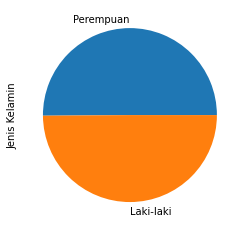

In [111]:
# Visualisasi data jenis kelamin responden
df = data[data['Jenis Kelamin']!='nan']
df['Jenis Kelamin'].value_counts().plot(kind="pie")

<AxesSubplot:>

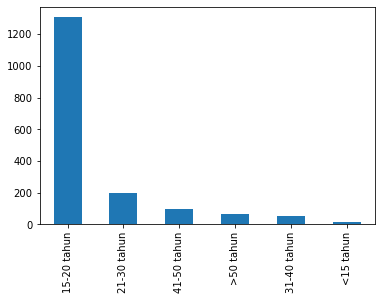

In [114]:
# Visualisasi Usia Responden
df = data[data['Usia']!='nan']
df['Usia'].value_counts(dropna=True).plot(kind="bar",x='Usia',y='counts')

<AxesSubplot:>

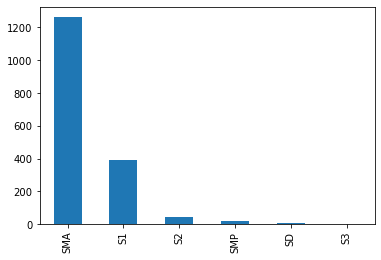

In [126]:
# Visualisasi Pendidikan Terakhir
df = data[data['Pendidikan Terakhir']!='nan']
df['Pendidikan Terakhir'].value_counts().plot.bar()

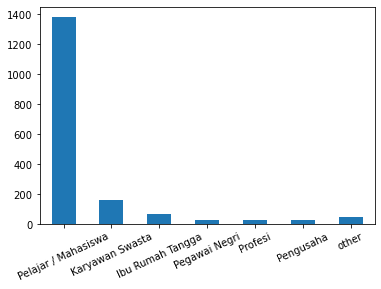

In [123]:
# Visualisasi Pekerjaan
df = data[data['Pekerjaan']!='nan']
prob = df['Pekerjaan'].value_counts()
threshold = 10
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
prob.plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

<AxesSubplot:>

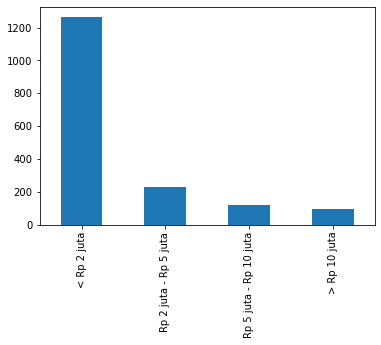

In [125]:
# Visualisasi Penghasilan Bulanan
df = data[data['Penghasilan Bulanan']!='nan']
df['Penghasilan Bulanan'].value_counts().plot.bar()

<AxesSubplot:ylabel='Peningkatan Aktivitas Online'>

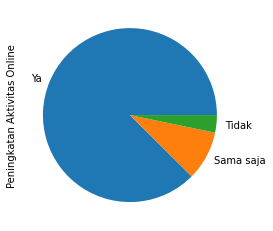

In [127]:
# Visualisasi data Peningkatan Aktivitas Online
df = data[data['Peningkatan Aktivitas Online']!='nan']
df['Peningkatan Aktivitas Online'].value_counts().plot(kind="pie")

<AxesSubplot:>

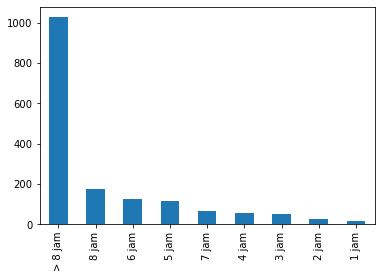

In [128]:
# Visualisasi Durasi Penggunaan Internet
df = data[data['Durasi Penggunaan Internet']!='nan']
df['Durasi Penggunaan Internet'].value_counts().plot.bar()

<AxesSubplot:ylabel='Cara Akses Provider Internet'>

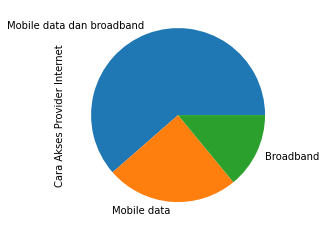

In [139]:
# Visualisasi data Cara Akses Provider Internet
df = data[data['Cara Akses Provider Internet']!='nan']
df['Cara Akses Provider Internet'].value_counts().plot(kind="pie")

<AxesSubplot:>

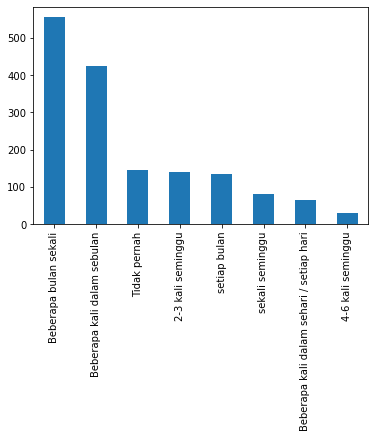

In [143]:
# Visualisasi Frekuensi Belanja Online
df = data[data['Frekuensi Belanja Online']!='nan']
df['Frekuensi Belanja Online'].value_counts().plot.bar()

# === TAHAP ANALISIS DATA ===

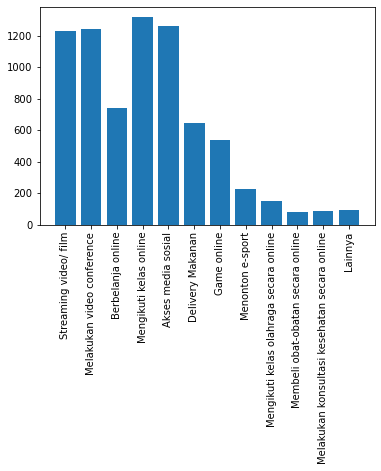

In [176]:
# Analisis Aktivitas Online yang Meningkat

count = 0

dataDict = {}
for index, row in data.iterrows():
    if row['Aktivitas Online Meningkat'] != 'nan':
        count+=1
        tempArr = row['Aktivitas Online Meningkat'].split(",")
        for i in tempArr:
            if i not in dataDict:
                dataDict[i] = 0
            dataDict[i] += 1

key = list(dataDict.keys())
value = list(dataDict.values())
Lainnya = 0
for i in range(len(dataDict)):
    if (value[i]<10):
        Lainnya+=value[i]
        dataDict.pop(key[i])
dataDict['Lainnya'] = Lainnya

plt.bar(range(len(dataDict)), list(dataDict.values()), align='center')
plt.xticks(range(len(dataDict)), list(dataDict.keys()), rotation=90)

plt.show()

In [186]:
# Confidence Interval Frekuensi Aktivitas Online - alpha = 0.05 -> Z = 1.96
import math

def CI (keystr):
    p = dataDict[keystr]/count
    LCI = p - (1.96)*math.sqrt(p*(1-(p))/(count))
    UCI = p + (1.96)*math.sqrt(p*(1-p)/(count))
    print(str(LCI)+" < "+keystr+" < "+str(UCI))

# Streaming video/film
CI('Streaming video/ film')
# Melakukan video conference
CI('Melakukan video conference')
# Berbelanja online
CI('Berbelanja online')
# Mengikuti kelas online
CI('Mengikuti kelas online')
# Akses media sosial
CI('Akses media sosial')
# Delivery makanan
CI('Delivery Makanan')
# Game online
CI('Game online')
# Menonton e-sport
CI('Menonton e-sport')

0.7182009189410452 < Streaming video/ film < 0.7604264139909236
0.726855642986618 < Melakukan video conference < 0.7686290048159106
0.4240078073120533 < Berbelanja online < 0.47183806866627304
0.7734075559735403 < Mengikuti kelas online < 0.8123841357784163
0.7386180889522755 < Akses media sosial < 0.7797443433174416
0.3648818688892991 < Delivery Makanan < 0.41175870907578216
0.3025784645601329 < Game online < 0.34763225187574914
0.11843167938628568 < Menonton e-sport < 0.15128535854267278


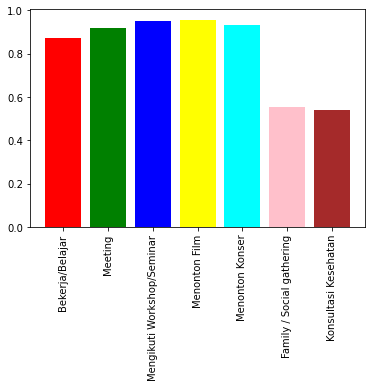

In [227]:
# Analisis kecenderungan aktivitas online

df = data[data['Kecenderungan Bekerja/Belajar']!='nan']
df = df[df['Kecenderungan Meeting']!='nan']
df = df[df['Kecenderungan Mengikuti Workshop/Seminar']!='nan']
df = df[df['Kecenderungan Menonton Film']!='nan']
df = df[df['Kecenderungan Menonton Konser']!='nan']
df = df[df['Kecenderungan Family / Social gathering']!='nan']
df = df[df['Kecenderungan Konsultasi Kesehatan']!='nan']

a = df['Kecenderungan Bekerja/Belajar'].value_counts(normalize=True)
b = df['Kecenderungan Meeting'].value_counts(normalize=True)
c = df['Kecenderungan Mengikuti Workshop/Seminar'].value_counts(normalize=True)
d = df['Kecenderungan Menonton Film'].value_counts(normalize=True)
e = df['Kecenderungan Menonton Konser'].value_counts(normalize=True)
f = df['Kecenderungan Family / Social gathering'].value_counts(normalize=True)
g = df['Kecenderungan Konsultasi Kesehatan'].value_counts(normalize=True)

plt.bar(x= ['Bekerja/Belajar'], height=a, color='r' )
plt.bar(x= ['Meeting'], height=b, color='g' )
plt.bar(x= ['Mengikuti Workshop/Seminar'], height=c, color='b' )
plt.bar(x= ['Menonton Film'], height=d, color='yellow' )
plt.bar(x= ['Menonton Konser'], height=e, color='cyan' )
plt.bar(x= ['Family / Social gathering'], height=f, color='pink' )
plt.bar(x= ['Konsultasi Kesehatan'], height=g, color='brown')
plt.xticks(rotation=90)
plt.show()

In [228]:
# Confidence Interval
h = df['Kecenderungan Bekerja/Belajar'].value_counts()
counts = h.Online+h.Offline

def CI2 (nama,p,count):
    LCI = p - (1.96)*math.sqrt(p*(1-(p))/(count))
    UCI = p + (1.96)*math.sqrt(p*(1-p)/(count))
    print(str(LCI)+" < "+nama+" < "+str(UCI))

CI2('Bekerja/Belajar', a.Online, counts)
CI2('Meeting', b.Online, counts)
CI2('Mengikuti Workshop/Seminar', c.Online, counts)
CI2('Menonton Film', d.Online, counts)
CI2('Menonton Konser', e.Online, counts)
CI2('Family / Social gathering', f.Online, counts)
CI2('Konsultasi Kesehatan', g.Online, counts)

0.8550589797840243 < Bekerja/Belajar < 0.8906659272791727
0.9027662153818358 < Meeting < 0.9321780225363799
0.9377333052055331 < Mengikuti Workshop/Seminar < 0.9611514531587791
0.9460211714273096 < Menonton Film < 0.9677334754128392
0.92054396847249 < Menonton Konser < 0.9471140240925658
0.41805238877407364 < Family / Social gathering < 0.47116694208094495
0.5109001639403772 < Konsultasi Kesehatan < 0.5641927728625968


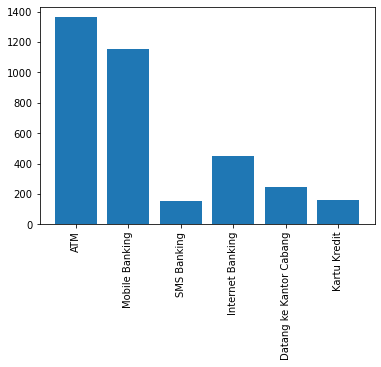

In [205]:
# Analisis Penggunaan Layanan Bank

count = 0

dataDict = {}
for index, row in data.iterrows():
    if row['Penggunaan Layanan Bank'] != 'nan':
        count+=1
        tempArr = row['Penggunaan Layanan Bank'].split(",")
        for i in tempArr:
            if i not in dataDict:
                dataDict[i] = 0
            dataDict[i] += 1

key = list(dataDict.keys())
value = list(dataDict.values())
Lainnya = 0
for i in range(len(dataDict)):
    if (value[i]<10):
        Lainnya+=value[i]
        dataDict.pop(key[i])

plt.bar(range(len(dataDict)), list(dataDict.values()), align='center')
plt.xticks(range(len(dataDict)), list(dataDict.keys()), rotation=90)

plt.show()

In [206]:
# Confidence Interval Penggunaan Layanan Bank

# ATM
CI('ATM')
# Mobile Banking
CI('Mobile Banking')
# SMS Banking
CI('SMS Banking')
# Internet Banking
CI('Internet Banking')
# Datang ke Kantor Cabang
CI('Datang ke Kantor Cabang')
# Kartu Kredit
CI('Kartu Kredit')

0.8373440861395988 < ATM < 0.8719290968177947
0.7030291946371228 < Mobile Banking < 0.7468454920796692
0.08083644924163333 < SMS Banking < 0.10963974123455714
0.2586564199376907 < Internet Banking < 0.3027470888342391
0.13642033744993 < Datang ke Kantor Cabang < 0.1718503392417993
0.0843448926098246 < Kartu Kredit < 0.11365009485884707


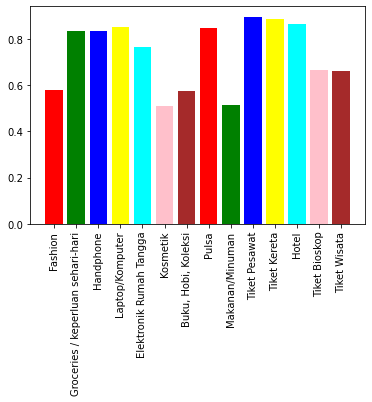

In [233]:
# Analisis kecenderungan belanja online

df = data[data['Belanja Fashion']!='nan']
df = df[df['Belanja Groceries / keperluan sehari-hari']!='nan']
df = df[df['Belanja Handphone']!='nan']
df = df[df['Belanja Laptop/Komputer']!='nan']
df = df[df['Belanja Elektronik Rumah Tangga']!='nan']
df = df[df['Belanja Kosmetik']!='nan']
df = df[df['Belanja Buku, Hobi, Koleksi']!='nan']
df = df[df['Belanja Pulsa']!='nan']
df = df[df['Belanja Makanan/Minuman']!='nan']
df = df[df['Belanja Tiket Pesawat']!='nan']
df = df[df['Belanja Tiket Kereta']!='nan']
df = df[df['Belanja Hotel']!='nan']
df = df[df['Belanja Tiket Bioskop']!='nan']
df = df[df['Belanja Tiket Wisata']!='nan']

d1 = data['Belanja Fashion'].value_counts(normalize=True)
d2 = df['Belanja Groceries / keperluan sehari-hari'].value_counts(normalize=True)
d3 = df['Belanja Handphone'].value_counts(normalize=True)
d4 = df['Belanja Laptop/Komputer'].value_counts(normalize=True)
d5 = df['Belanja Elektronik Rumah Tangga'].value_counts(normalize=True)
d6 = df['Belanja Kosmetik'].value_counts(normalize=True)
d7 = df['Belanja Buku, Hobi, Koleksi'].value_counts(normalize=True)
d8 = df['Belanja Pulsa'].value_counts(normalize=True)
d9 = df['Belanja Makanan/Minuman'].value_counts(normalize=True)
d10 = df['Belanja Tiket Pesawat'].value_counts(normalize=True)
d11 = df['Belanja Tiket Kereta'].value_counts(normalize=True)
d12 = df['Belanja Hotel'].value_counts(normalize=True)
d13 = df['Belanja Tiket Bioskop'].value_counts(normalize=True)
d14 = df['Belanja Tiket Wisata'].value_counts(normalize=True)

plt.bar(x= ['Fashion'], height=d1, color='r' )
plt.bar(x= ['Groceries / keperluan sehari-hari'], height=d2, color='g' )
plt.bar(x= ['Handphone'], height=d3, color='b' )
plt.bar(x= ['Laptop/Komputer'], height=d4, color='yellow' )
plt.bar(x= ['Elektronik Rumah Tangga'], height=d5, color='cyan' )
plt.bar(x= ['Kosmetik'], height=d6, color='pink' )
plt.bar(x= ['Buku, Hobi, Koleksi'], height=d7, color='brown')
plt.bar(x= ['Pulsa'], height=d8, color='r' )
plt.bar(x= ['Makanan/Minuman'], height=d9, color='g' )
plt.bar(x= ['Tiket Pesawat'], height=d10, color='b' )
plt.bar(x= ['Tiket Kereta'], height=d11, color='yellow' )
plt.bar(x= ['Hotel'], height=d12, color='cyan' )
plt.bar(x= ['Tiket Bioskop'], height=d13, color='pink' )
plt.bar(x= ['Tiket Wisata'], height=d14, color='brown')

plt.xticks(rotation=90)
plt.show()

In [234]:
# Confidence Interval
counts = d14.Online+d14.Offline
CI2('Fashion', d1.Online, counts)
CI2('Groceries / keperluan sehari-hari', d2.Online, counts)
CI2('Handphone', d3.Online, counts)
CI2('Laptop/Komputer', d4.Online, counts)
CI2('Elektronik Rumah Tangga', d5.Online, counts)
CI2('Kosmetik', d6.Online, counts)
CI2('Buku, Hobi, Koleksi', d7.Online, counts)
CI2('Pulsa', d8.Online, counts)
CI2('Makanan/Minuman', d9.Online, counts)
CI2('Tiket Pesawat', d10.Online, counts)
CI2('Tiket Kereta', d11.Online, counts)
CI2('Hotel', d12.Online, counts)
CI2('Tiket Bioskop', d13.Online, counts)
CI2('Tiket Wisata', d14.Online, counts)

-0.5999428875300891 < Fashion < 1.1641340216694096
-0.5633109818977852 < Groceries / keperluan sehari-hari < 0.8953977433039183
-0.5615838663401502 < Handphone < 0.8891829688083626
-0.545942266205685 < Laptop/Komputer < 0.8376400971705318
-0.5961719977623563 < Elektronik Rumah Tangga < 1.0673761862440316
-0.47202570455786685 < Kosmetik < 1.4877325108405894
-0.39563108347274933 < Buku, Hobi, Koleksi < 1.542975885267813
0.14263776002680462 < Pulsa < 1.5522014321945865
-0.46657514598243954 < Makanan/Minuman < 1.4927531564536438
0.30313620840511535 < Tiket Pesawat < 1.4919273667631718
0.2692288415220554 < Tiket Kereta < 1.5063882115819087
0.19868858131788913 < Hotel < 1.533547768719508
-0.25897219163454077 < Tiket Bioskop < 1.5903110098843536
-0.2640023762646784 < Tiket Wisata < 1.5893576492639305


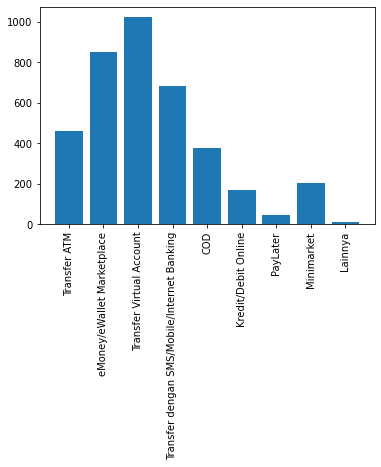

In [237]:
# Analisis Pembayaran Belanja Online

count = 0

dataDict = {}
for index, row in data.iterrows():
    if row['Pembayaran Belanja Online'] != 'nan':
        count+=1
        tempArr = row['Pembayaran Belanja Online'].split(",")
        for i in tempArr:
            if i not in dataDict:
                dataDict[i] = 0
            dataDict[i] += 1

key = list(dataDict.keys())
value = list(dataDict.values())
Lainnya = 0
for i in range(len(dataDict)):
    if (value[i]<10):
        Lainnya+=value[i]
        dataDict.pop(key[i])
dataDict['Lainnya'] = Lainnya

plt.bar(range(len(dataDict)), list(dataDict.values()), align='center')
plt.xticks(range(len(dataDict)), list(dataDict.keys()), rotation=90)

plt.show()

In [238]:
# Confidence Interval Pembayaran Belanja Online
CI('Transfer ATM')
CI('eMoney/eWallet Marketplace')
CI('Transfer Virtual Account')
CI('Transfer dengan SMS/Mobile/Internet Banking')
CI('COD')
CI('Kredit/Debit Online')
CI('PayLater')
CI('Minimarket')

0.2781311466483549 < Transfer ATM < 0.32408962408972475
0.5296429581620429 < eMoney/eWallet Marketplace < 0.5794360751495181
0.6439394252456683 < Transfer Virtual Account < 0.6911356890587079
0.4199143690720309 < Transfer dengan SMS/Mobile/Internet Banking < 0.4697002618881259
0.22593144487092442 < COD < 0.26916979614801745
0.09468806061805671 < Kredit/Debit Online < 0.12608267746162977
0.022622655765245758 < PayLater < 0.04008145919229833
0.115605151153642 < Minimarket < 0.14958100168763822
